# Семинар 2. Метрические методы машинного обучения. Метод k-ближайших соседей (KNN)

## 1. Что такое KNN?

KNN (k-Nearest Neighbors) — это простой, но мощный алгоритм машинного обучения, используемый для задач классификации и регрессии. Объект классифицируется на основе своих ближайших соседей

Пусть дан обучающий набор:

$$
D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_n, y_n) \}, \quad \mathbf{x}_i \in \mathbb{R}^d, \quad y_i \in \{1, 2, \dots, C\}
$$

Для нового объекта $\mathbf{x}_{\text{new}}$ нужно предсказать класс $y_{\text{pred}}$.

---

## 2. Алгоритм KNN
### 2.1. Классификация
1. Вычислить расстояние от $\mathbf{x}_{\text{new}}$ до всех $\mathbf{x}_i$ из обучающей выборки.
2. Найти $k$ ближайших соседей: $N_k(\mathbf{x}_{\text{new}})$.
3. Присвоить класс по **мажоритарному голосованию**:

$$
y_{\text{pred}} = \underset{c \in \{1,\dots,C\}}{\text{argmax}} \sum_{i \in N_k(\mathbf{x}_{\text{new}})} \mathbb{I}(y_i = c)
$$

где $\mathbb{I}(\cdot)$ — **индикаторная функция**:
$$
\mathbb{I}(y_i = c) =
\begin{cases}
1, & \text{если } y_i = c \\
0, & \text{иначе}
\end{cases}
$$

### 2.2. Регрессия

1. Вычислить расстояние от $\mathbf{x}_{\text{new}}$ до всех $\mathbf{x}_i$ из обучающей выборки.  
2. Найти $k$ ближайших соседей: $N_k(\mathbf{x}_{\text{new}})$.  
3. Предсказать значение целевой переменной как **среднее арифметическое** значений $y_i$ у $k$ соседей:

$$
y_{\text{pred}} = \frac{1}{k} \sum_{i \in N_k(\mathbf{x}_{\text{new}})} y_i
$$


---

## 3. Метрики расстояния

#### Евклидово расстояние ($L_2$):

$$
d(\mathbf{x}, \mathbf{x}') = \sqrt{\sum_{j=1}^{d} (x_j - x'_j)^2}
$$

#### Манхэттенское расстояние ($L_1$):

$$
d(\mathbf{x}, \mathbf{x}') = \sum_{j=1}^{d} |x_j - x'_j|
$$

#### Расстояние Минковского (обобщение):

$$
d(\mathbf{x}, \mathbf{x}') = \left( \sum_{j=1}^{d} |x_j - x'_j|^p \right)^{1/p}
$$

- При $p=1$ → Манхэттенское расстояние.
- При $p=2$ → Евклидово расстояние.

#### Расстояние Чебышева:
$$
d(\mathbf{x}, \mathbf{x}') = \max_{j=1,\dots,d} |x_j - x'_j|
$$

#### Косинуносное расстояние:

Сначала схожесть:
$$
\text{cosine\_sim}(\mathbf{x}, \mathbf{x}') = \frac{\mathbf{x} \cdot \mathbf{x}'}{\|\mathbf{x}\| \|\mathbf{x}'\|} = \frac{\sum_{j=1}^{d} x_j x'_j}{\sqrt{\sum_{j=1}^{d} x_j^2} \cdot \sqrt{\sum_{j=1}^{d} {x'_j}^2}}
$$
Затем расстояние:
$$
d(\mathbf{x}, \mathbf{x}') = 1 - \text{cosine\_sim}(\mathbf{x}, \mathbf{x}')
$$

---

## 4. Взвешенный KNN

Чтобы учитывать расстояния при голосовании, вводятся **веса**, обратно пропорциональные расстоянию:

$$
w_i = \frac{1}{d(\mathbf{x}_{\text{new}}, \mathbf{x}_i) + \varepsilon}, \quad \varepsilon \to 0^+ \quad \text{(для избежания деления на 0)}
$$

Тогда предсказание класса вычисляется как:

$$
y_{\text{pred}} = \underset{c}{\text{argmax}} \sum_{i \in N_k} w_i \cdot \mathbb{I}(y_i = c)
$$
где:
- $w_i$ — вес $i$-го соседа,
- $\mathbb{I}(y_i = c)$ — индикаторная функция (1, если $y_i = c$, иначе 0),
- $N_k$ — множество индексов $k$ ближайших соседей.

А задача регресии выглядит как:

$$
y_{\text{pred}} = \frac{ \sum_{i \in N_k} w_i \cdot y_i }{ \sum_{i \in N_k} w_i }, \quad \text
{где} \quad w_i = \frac{1}{d(\mathbf{x}_{\text{new}}, \mathbf{x}_i) + \varepsilon}, \quad \varepsilon \to 0^+
$$

---

## 5. Выбор k
Маленькое **k** (например, 1) → чувствителен к шуму, риск переобучения.

Большое **k** → сглаживание, риск недообучения.

Оптимальное **k** подбирается через кросс-валидацию.


---

## 6. Нормализация признаков

KNN чувствителен к масштабу

Если признаки имеют разные единицы, то необходимо применять масштабирование


---

## 7. Кросс-валидация (Cross-Validation)

Кросс-валидация — это метод оценки качества модели машинного обучения, устойчивый к случайности разбиения данных. Особенно важна для подбора гиперпараметров (например, $k$ в KNN).

### Зачем нужна?

Если мы просто делим данные на train/test, то:

- Качество модели может **сильно зависеть от того, какие объекты попали в тест**.
- Мы **не используем все данные** для обучения.
- Нет уверенности, что результат не случаен.

**Кросс-валидация решает эти проблемы.**

### K-Fold Cross-Validation (наиболее популярный метод)

1. Разбиваем обучающую выборку на $K$ равных (или почти равных) **фолдов** (частей).
2. Поочерёдно каждый фолд используется как **валидационный**, а остальные $K-1$ — как **обучающие**.
3. Модель обучается $K$ раз, каждый раз на разных данных.
4. Итоговое качество — **среднее по всем фолдам**.


### Формула:

Пусть $S_1, S_2, \dots, S_K$ — разбиение обучающей выборки на $K$ фолдов.  
Тогда оценка качества модели $M$:

$$
\text{CV Score} = \frac{1}{K} \sum_{i=1}^{K} \text{Score}(M_{-i}, S_i)
$$

где:
- $M_{-i}$ — модель, обученная на всех фолдах, кроме $i$-го,
- $\text{Score}(M_{-i}, S_i)$ — метрика качества (например, accuracy, MSE) на $i$-м фолде.


### Зачем использовать в KNN?

- Чтобы **найти оптимальное $k$** — перебираем $k=1, 3, 5, \dots$, для каждого считаем CV Score.
- Выбираем $k$, при котором **средняя оценка на фолдах максимальна**.
- Это **надёжнее**, чем просто accuracy на одном тестовом наборе.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [5]:
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)

In [6]:
df_iris['target'] = y_iris
df_iris['species'] = df_iris['target'].map({i: name for i, name in enumerate(iris.target_names)})

In [7]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [8]:
print(df_iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [9]:
print(df_iris['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Figure size 1000x800 with 0 Axes>

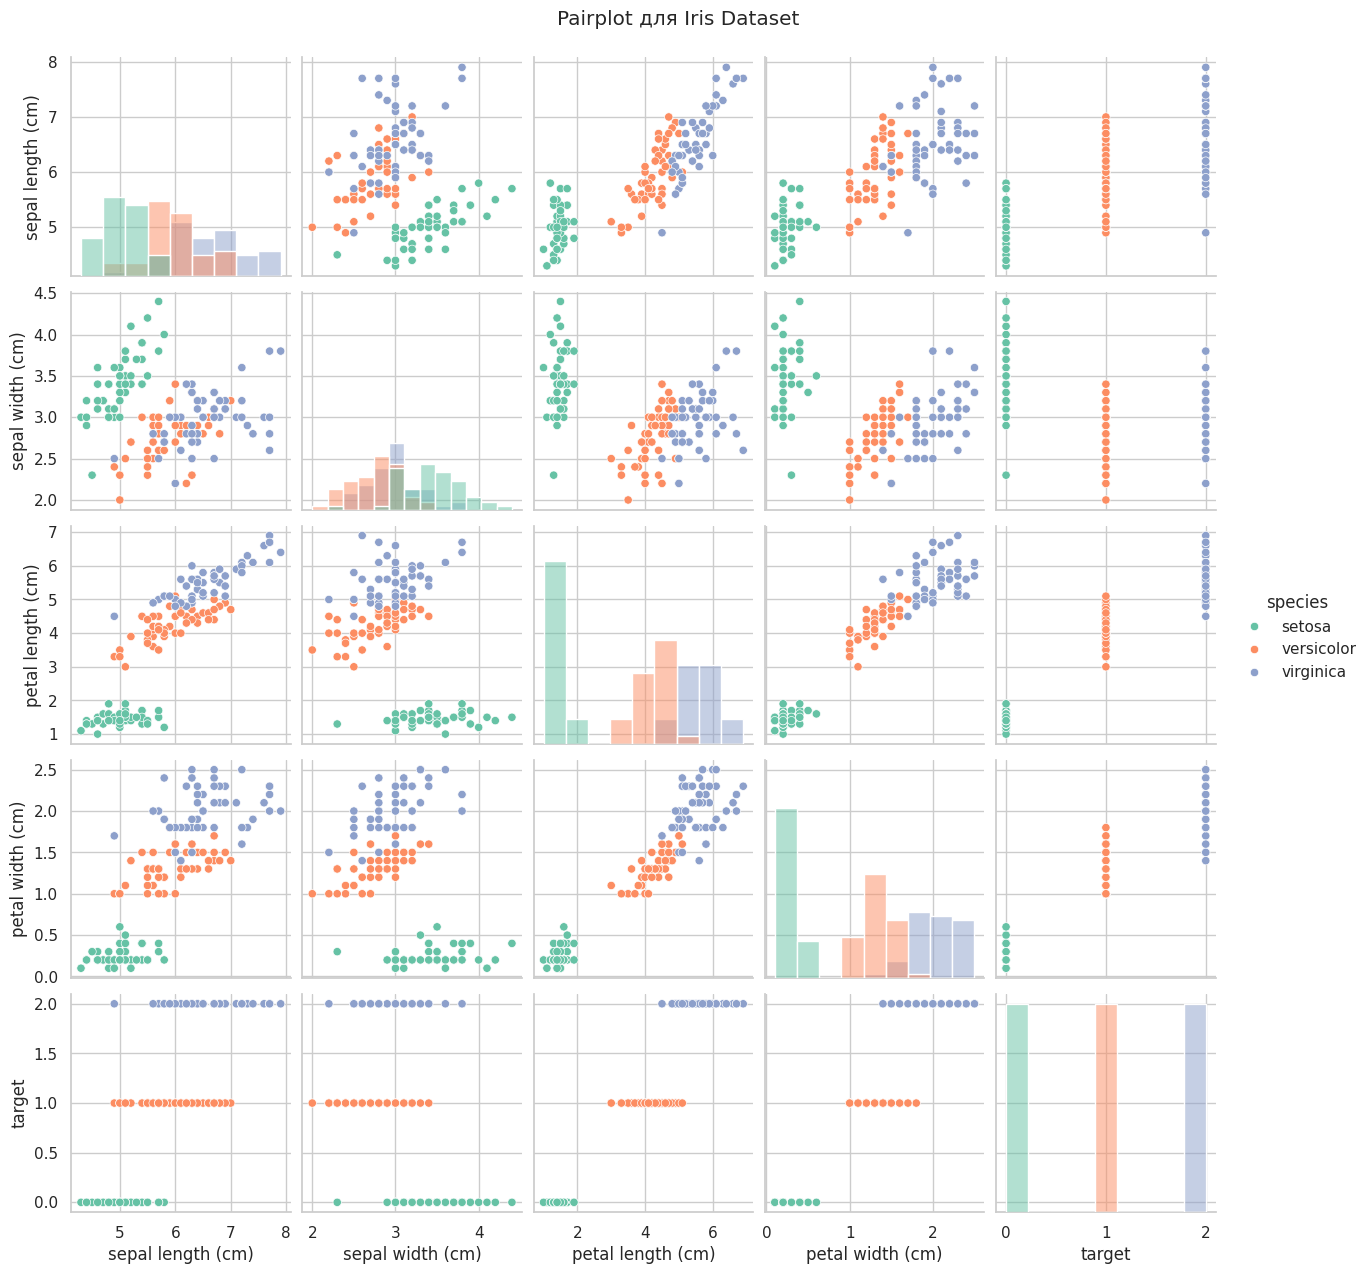

In [10]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_iris, hue='species', palette='Set2', diag_kind='hist')
plt.suptitle("Pairplot для Iris Dataset", y=1.02)
plt.show()

In [19]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

In [11]:
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

NameError: name 'X_train_iris' is not defined

In [21]:
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train_iris_scaled, y_train_iris)

KNeighborsClassifier()

In [22]:
y_pred_iris = knn_iris.predict(X_test_iris_scaled)

In [23]:
acc_iris = accuracy_score(y_test_iris, y_pred_iris)

In [24]:
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



In [25]:
print(f"Accuracy KNN на тестовой выборке (Iris): {acc_iris:.4f}")

Accuracy KNN на тестовой выборке (Iris): 0.9111


In [26]:
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



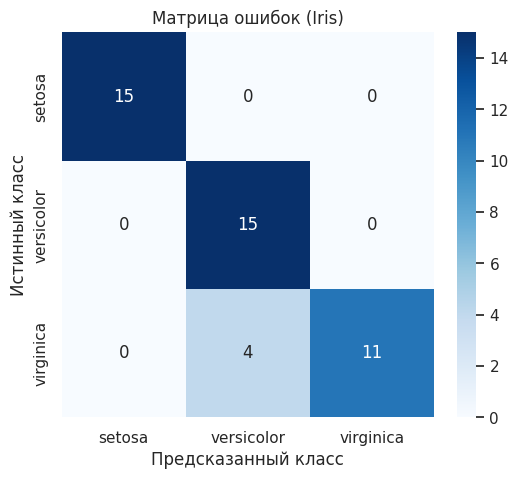

In [31]:
plt.figure(figsize=(6, 5))
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Матрица ошибок (Iris)")
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

In [42]:
knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_distance.fit(X_train_iris_scaled, y_train_iris)
y_pred_distance = knn_distance.predict(X_test_iris_scaled)

In [46]:
acc_distance = accuracy_score(y_test_iris, y_pred_distance)
print(f"   Взвешенный KNN (distance): {acc_distance:.4f}")

   Взвешенный KNN (distance): 0.9111


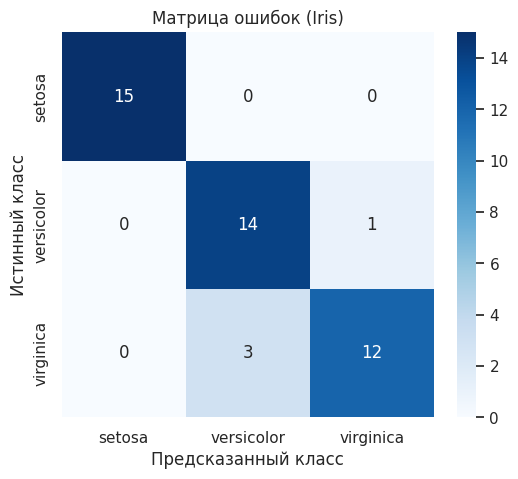

In [47]:
plt.figure(figsize=(6, 5))
cm_iris = confusion_matrix(y_test_iris, y_pred_distance)
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Матрица ошибок (Iris)")
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

In [37]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_iris_scaled, y_train_iris, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"Оптимальное k: {best_k}")
print(f"Средняя accuracy при k={best_k}: {best_score:.4f}")

Оптимальное k: 14
Средняя accuracy при k=14: 0.9714


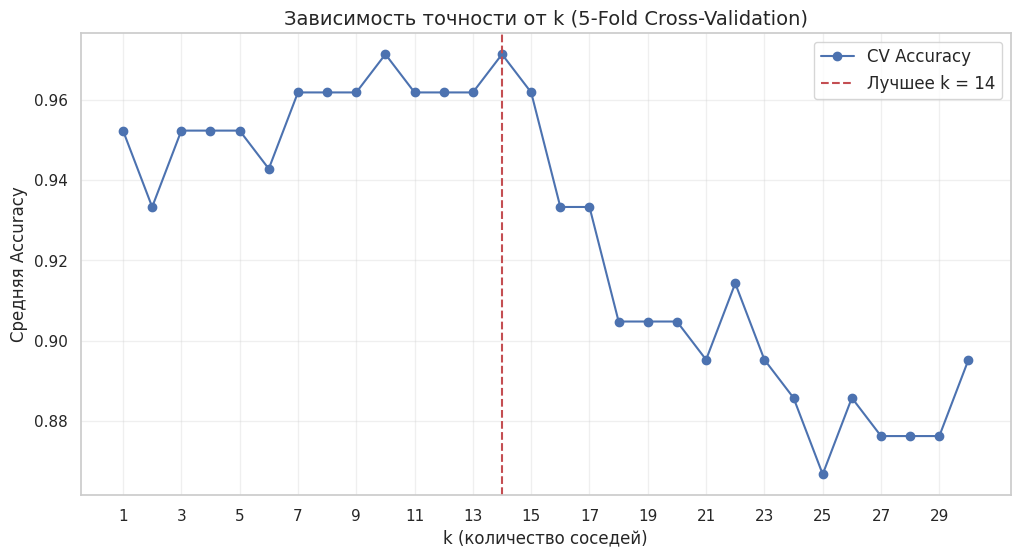

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Лучшее k = {best_k}')
plt.title('Зависимость точности от k (5-Fold Cross-Validation)', fontsize=14)
plt.xlabel('k (количество соседей)', fontsize=12)
plt.ylabel('Средняя Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range[::2])
plt.show()